<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/unluckid/model/blob/main/model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# 설정

In [10]:
import gdown
import numpy as np
import cv2
import numpy as np
import os
import shutil
file_id = '181xBl-rU9gBAL8-iEZbPNxKzPZY-QCGu'
download_url = f'https://drive.google.com/uc?id={file_id}'


# 다운로드 시작

gdown.download(download_url, '/content/dataset.zip', quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=181xBl-rU9gBAL8-iEZbPNxKzPZY-QCGu
From (redirected): https://drive.google.com/uc?id=181xBl-rU9gBAL8-iEZbPNxKzPZY-QCGu&confirm=t&uuid=14a4bdf3-c06d-4924-8aec-376e999b2f10
To: /content/dataset.zip
100%|██████████| 1.65G/1.65G [00:09<00:00, 169MB/s]


'/content/dataset.zip'

In [11]:
import zipfile


zip_file_path = '/content/dataset.zip'
extract_path = '/content/'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"압축이 {extract_path}에 해제되었습니다.")

압축이 /content/에 해제되었습니다.


In [7]:
os.makedirs("train/", exist_ok=True)
os.makedirs("val/", exist_ok=True)

In [12]:
class Image_propressing:
    def __init__(self):
        #  폴더 경로
        self.video_path = "video/"  # 비디오 폴더
        self.nature_img_folder_path = "nature/"  # 전처리 이전 폴더
        self.model1_img_folder_path = "model1/"  # 기본 모델 폴더
        self.model2_img_folder_path = "model2/"  # 캐니 모델 폴더
        self.train_path = "train/"
        self.val_path = "val/"
        self.data = []  # 전처리 전 데이터셋

        self.label = ["_ari", "_smallthe", "_corki", "_velkoz", "_thresh", "_gragas", "_atrox", "_kogmaw"]  # 10개의 이미지 폴더에 대한 값
        self.model_data1 = []  # 기본 이미지 모델 데이터셋
        self.model_data2 = []  # 캐니 이미지 모델 데이터셋
        self.valimgs = []    # 폴더 내 이미지 파일 이름을 저장할 리스트
        self.trainimgs = []  # 폴더 내 이미지 파일 이름을 저장할 리스트
        self.train_save = 3
        self.val_save = 11
    def reset_folder(self):
        shutil.rmtree(self.train_path)
        shutil.rmtree(self.val_path)
        print("폴더 초기화")
    def set_folder(self):
        os.makedirs(self.video_path, exist_ok=True)
        os.makedirs(self.train_path + self.nature_img_folder_path, exist_ok=True)
        os.makedirs(self.train_path + self.model1_img_folder_path, exist_ok=True)
        os.makedirs(self.train_path + self.model2_img_folder_path, exist_ok=True)
        os.makedirs(self.val_path + self.nature_img_folder_path, exist_ok=True)
        os.makedirs(self.val_path + self.model1_img_folder_path, exist_ok=True)
        os.makedirs(self.val_path + self.model2_img_folder_path, exist_ok=True)
        for label in self.label:                   # 10개의 하위 폴더 생성 코드 추가 작성
            os.makedirs(self.video_path + label, exist_ok=True)
            os.makedirs(self.train_path + self.nature_img_folder_path + label, exist_ok=True)
            os.makedirs(self.train_path + self.model1_img_folder_path + label, exist_ok=True)
            os.makedirs(self.train_path + self.model2_img_folder_path + label, exist_ok=True)
            os.makedirs(self.val_path + self.nature_img_folder_path + label, exist_ok=True)
            os.makedirs(self.val_path + self.model1_img_folder_path + label, exist_ok=True)
            os.makedirs(self.val_path + self.model2_img_folder_path + label, exist_ok=True)
        print("setting folder")

    def save_train(self):
        for label in self.label:
            for file_name in os.listdir(self.video_path + label):
                file_path = os.path.join(self.video_path + label, file_name)
                video_capture = cv2.VideoCapture(file_path) # 동영상 로드
                if not video_capture.isOpened():
                    print("error_00: " + label + ": 동영상 없음 ")
                frame_count, train_count, val_count = 0, 0, 0
                fps = video_capture.get(cv2.CAP_PROP_FPS)  # fps 설정
                train_save = int(fps * self.train_save/10)  # 훈련에 사용될 이미지 정리  3초 간격으로 작성
                val_save = int(fps * self.val_save/10)   # 훈련에 사용될 이미지 정리  11초 간격으로 작성
                while True:
                    ret, frame = video_capture.read()
                    if not ret:
                        break  # 프레임이 더 이상 없으면 반복문 종료
                    # 프레임 파일 이름 형식 지정 및 저장
                    if frame_count % train_save == 0:
                        frame_filename = os.path.join(self.train_path + self.nature_img_folder_path + label, f"{file_name}_{train_count:04d}.png")
                        frame = cv2.resize(frame, (240, 240))  # 이미지 크기 미리 정리
                        cv2.imwrite(frame_filename, frame)
                        train_count += 1
                    elif frame_count % val_save == 0:  # elif 이미지 중복 제거
                        frame_filename = os.path.join(self.val_path + self.nature_img_folder_path + label, f"{file_name}_{val_count:04d}.png")
                        frame = cv2.resize(frame, (240, 240))  # 이미지 크기 미리 정리
                        cv2.imwrite(frame_filename, frame)
                        val_count += 1
                    frame_count += 1
                    # 자원 해제
                video_capture.release()

    # 이미지의 폴더 패스를 받고 이를 self.imgs 에 저장한다.
    def set_img(self, model): #이미지 이름을 모두 따서 self.imgs에 저장해둠
        self.valimgs = []
        self.trainimgs = []
        for label in self.label:
            for img in os.listdir(self.val_path + model + label):
                if os.path.splitext(img)[1].lower() in {".png", ".jpg"}:
                    self.valimgs.append([self.val_path, model, label, img])
                else:
                    print("error_01: 이미지 전처리 에러")
        for label in self.label:
            for img in os.listdir(self.train_path + model + label):
                if os.path.splitext(img)[1].lower() in {".png", ".jpg"}:
                    self.trainimgs.append([self.train_path, model, label, img])
                else:
                    print("error_01: 이미지 전처리 에러")
    """
    # 이미지 로테이트 함수
    def made_model1_dataset(self):
        self.set_img(self.nature_img_folder_path)
        for path in self.valimgs:
            image = cv2.imread(path[0]+path[1]+path[2]+"/"+path[3], cv2.IMREAD_COLOR)
            height, width = image.shape[:2]
            for i in range(12):
                r_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), i * 30, 1.0)
                r_img = cv2.warpAffine(image, r_matrix, (width, height))
                cv2.imwrite(self.val_path+self.model1_img_folder_path+path[2]+"/"+str(i)+path[3], r_img)
        for path in self.trainimgs:
            image = cv2.imread(path[0]+path[1]+path[2]+"/"+path[3], cv2.IMREAD_COLOR)
            height, width = image.shape[:2]
            for i in range(12):
                r_matrix = cv2.getRotationMatrix2D((width // 2, height // 2), i * 30, 1.0)
                r_img = cv2.warpAffine(image, r_matrix, (width, height))
                cv2.imwrite(self.train_path+self.model1_img_folder_path+path[2]+"/"+str(i)+path[3], r_img)
        # return self.model_data1    # data리스트 반환
      """
    def made_model2_dataset(self):
        self.set_img(self.nature_img_folder_path)
        for path in self.valimgs:
            image = cv2.imread(path[0] + path[1] + path[2]+"/"+path[3], cv2.IMREAD_GRAYSCALE)
            img_c = cv2.Canny(image, 30, 80)
            cv2.imwrite(path[0]+self.model2_img_folder_path+path[2]+"/"+path[3], img_c)
        for path in self.trainimgs:
            image = cv2.imread(path[0] + path[1] + path[2] + "/" + path[3], cv2.IMREAD_GRAYSCALE)
            img_c = cv2.Canny(image, 30, 80)
            cv2.imwrite(path[0] + self.model2_img_folder_path + path[2]+"/" + path[3], img_c)
        print("생성 완료")

In [13]:
IMGP = Image_propressing()
IMGP.reset_folder()  # 폴더 초기화
IMGP.set_folder()
IMGP.save_train()
#IMGP.made_model1_dataset() # 로테이트 이미지 생성자 사용 안함
#IMGP.made_model2_dataset() # canny이미지 생성자 사용 안함
"""
IMGP.train_path = "train1/"
IMGP.val_path = "val1/"
IMGP.train_save = 4
IMGP.val_save = 13
IMGP.set_folder()
IMGP.save_train()
IMGP.made_model1_dataset()
IMGP.made_model2_dataset()
"""

폴더 초기화
setting folder
error_00: _ari: 동영상 없음 
error_00: _smallthe: 동영상 없음 


'\nIMGP.train_path = "train1/"\nIMGP.val_path = "val1/"\nIMGP.train_save = 4\nIMGP.val_save = 13\nIMGP.set_folder()\nIMGP.save_train()\nIMGP.made_model1_dataset()\nIMGP.made_model2_dataset()\n'

In [14]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from sklearn.ensemble import VotingClassifier,BaggingClassifier
from tensorflow.keras.applications import VGG16, Xception , InceptionV3
from tensorflow.keras.models import load_model

In [15]:
train_dir = "train/nature"
val_dir = "val/nature"
# 데이터 증강 (학습 데이터에만 적용)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=180,       # 회전 범위 증가
)

# 검증 데이터는 증강하지 않음 (단순히 정규화만 적용)
val_datagen = ImageDataGenerator(rescale=1./255)

# 학습 데이터 생성기
train_generator = train_datagen.flow_from_directory(
    train_dir,  # 학습 데이터 경로
    target_size=(224, 224),  # VGG16의 입력 크기에 맞게 리사이즈
    batch_size=32,
    class_mode='categorical',  # 다중 클래스 분류
    shuffle=True
)

# 검증 데이터 생성기
val_generator = val_datagen.flow_from_directory(
    val_dir,  # 검증 데이터 경로
    target_size=(224, 224),  # VGG16의 입력 크기에 맞게 리사이즈
    batch_size=32,
    class_mode='categorical'  # 다중 클래스 분류
)

# tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 8), dtype=tf.float32)
    )
)

val_dataset = tf.data.Dataset.from_generator(
    lambda: val_generator,
    output_signature=(
        tf.TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 8), dtype=tf.float32)
    )
)
train_dataset = train_dataset.repeat()  # 학습 데이터 무한 반복
val_dataset = val_dataset.repeat()      # 검증 데이터 무한 반복


Found 4872 images belonging to 8 classes.
Found 852 images belonging to 8 classes.


In [17]:
def addlayer(model):
# 모델에 Flatten 레이어 추가
  x = layers.Flatten()(model.output)
  # Dense 레이어 추가 (출력 클래스 수에 맞게)
  x = layers.Dense(512, activation='relu')(x)
  x = layers.Dropout(0.6)(x)  # Dropout 추가
  x = layers.Dense(8, activation='softmax')(x)
  made_model = models.Model(inputs=model.input, outputs=x)
  return made_model

In [21]:
# VGG16 모델 불러오기 (pre-trained weights 사용, top layers 제외)
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
inceptionv3_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# 모델에 Flatten 레이어 추가
x = layers.Flatten()(vgg16_base.output)

# Dense 레이어 추가 (출력 클래스 수에 맞게)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.6)(x)  # Dropout 추가
x = layers.Dense(6, activation='softmax')(x)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [22]:
vgg16 = addlayer(vgg16_base)
inceptionv3 = addlayer(inceptionv3_base)

for layer in vgg16_base.layers:
    layer.trainable = False
for layer in inceptionv3_base.layers:
    layer.trainable = False

# 모델 컴파일
vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
inceptionv3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 정보 출력
#vgg16.summary()
#ResNet50.summary()
#inceptionv3.summary()
#xception.summary()

In [24]:
# steps_per_epoch, validation_steps 설정
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = val_generator.samples // val_generator.batch_size
# 모델 학습
def hist(model,train_dataset,steps_per_epoch,val_dataset,validation_steps):
  history = model.fit(
      train_dataset,  # tf.data.Dataset 사용
      steps_per_epoch=steps_per_epoch,  # 배치 크기에 맞춰 학습 스텝 설정
      epochs=50,  # 에포크 수
      validation_data=val_dataset,  # 검증 데이터
      validation_steps=validation_steps  # 검증 배치 크기 맞추기
  )
  return history
vgg16_h =  hist(vgg16,train_dataset,steps_per_epoch,val_dataset,validation_steps)
vgg16.save('vgg16.keras')

inceptionv3_h =  hist(vgg16,train_dataset,steps_per_epoch,val_dataset,validation_steps)
inceptionv3.save('inceptionv3.keras')


Epoch 1/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 79s 522ms/step - accuracy: 0.4092 - loss: 2.9286 - val_accuracy: 0.7728 - val_loss: 0.8477
Epoch 2/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 80s 527ms/step - accuracy: 0.6327 - loss: 0.9123 - val_accuracy: 0.8427 - val_loss: 0.6295
Epoch 3/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 69s 457ms/step - accuracy: 0.7115 - loss: 0.7194 - val_accuracy: 0.8671 - val_loss: 0.5265
Epoch 4/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 453ms/step - accuracy: 0.7165 - loss: 0.6822 - val_accuracy: 0.8780 - val_loss: 0.4211
Epoch 5/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 452ms/step - accuracy: 0.7325 - loss: 0.6498 - val_accuracy: 0.8671 - val_loss: 0.3991
Epoch 6/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 69s 458ms/step - accuracy: 0.7414 - loss: 0.5982 - val_accuracy: 0.8927 - val_loss: 0.4074
Epoch 7/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 451ms/step - accuracy: 0.7471 - loss: 0.5794 - val_accuracy: 0.9256 - val_loss: 0.3077
Epoch 8/50
152/152 ━━━━━━━━━━━━━━━━━━━━ 68s 449ms/step - accuracy: 0.7635 - loss: 0

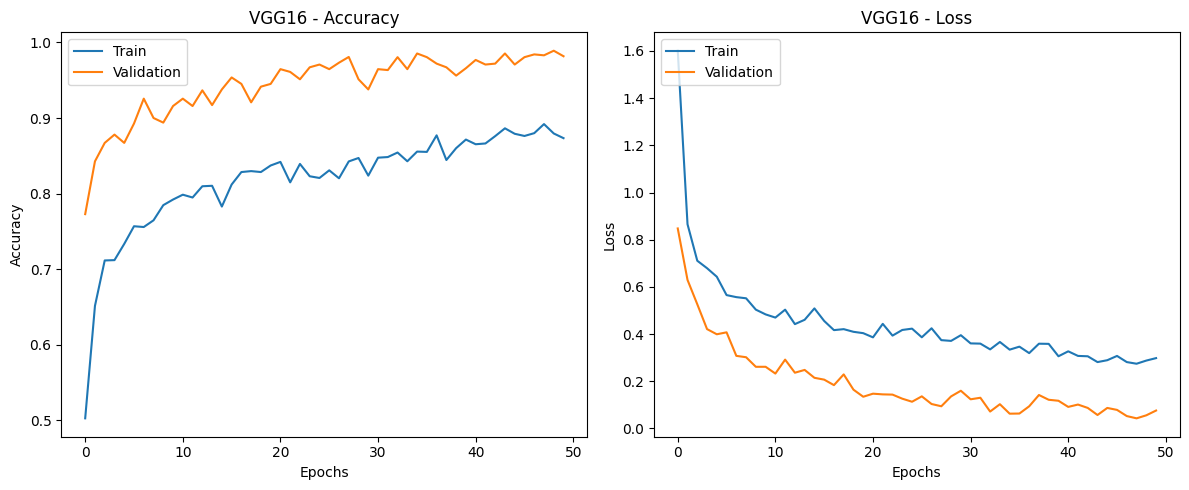

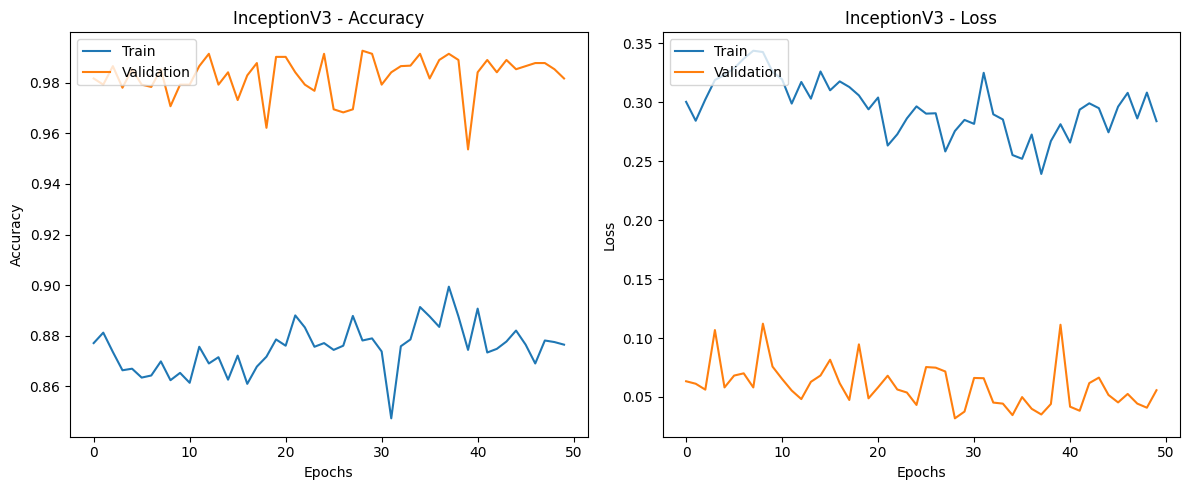

In [27]:
import matplotlib.pyplot as plt

history_list = [vgg16_h,  inceptionv3_h,]
model_names = ['VGG16',  'InceptionV3', ]

# 각 모델에 대해 학습 및 검증 정확도와 손실을 그리는 반복문
for i, history in enumerate(history_list):
    plt.figure(figsize=(12, 5))

    # 정확도 그래프
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_names[i]} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # 손실 그래프
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_names[i]} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step
y_true: 852, y_scores: 852


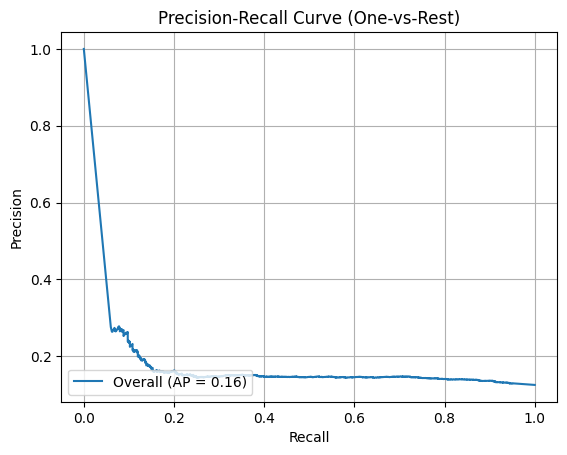

In [34]:

y_true = val_generator.classes  # 실제 클래스 라벨

# 예측 확률 계산 (전체 검증 데이터에 대해 예측)
y_scores = vgg16.predict(val_generator)

y_true_one_hot = np.zeros_like(y_scores)
y_true_one_hot[np.arange(len(y_true)), y_true] = 1  # 실제 클래스 라벨을 One-hot 형식으로 변환

# precision-recall curve 계산
precision, recall, _ = precision_recall_curve(y_true_one_hot.ravel(), y_scores.ravel())

# 평균 정밀도 (Average Precision) 계산
average_precision = average_precision_score(y_true_one_hot.ravel(), y_scores.ravel())

# Precision-Recall Curve 그리기
plt.plot(recall, precision, label=f'Overall (AP = {average_precision:.2f})')

# 그래프 설정
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (One-vs-Rest)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()
